# **Providing data-driven suggestions for HR**

In this capstone project, we attempt to predict the departure of employees from the company by identifying factors that lead to them leaving.

Estimated reading time: **30** mins

# **PACE stages**
The following PACE framework is used as guideposts towards completing the capstone project.

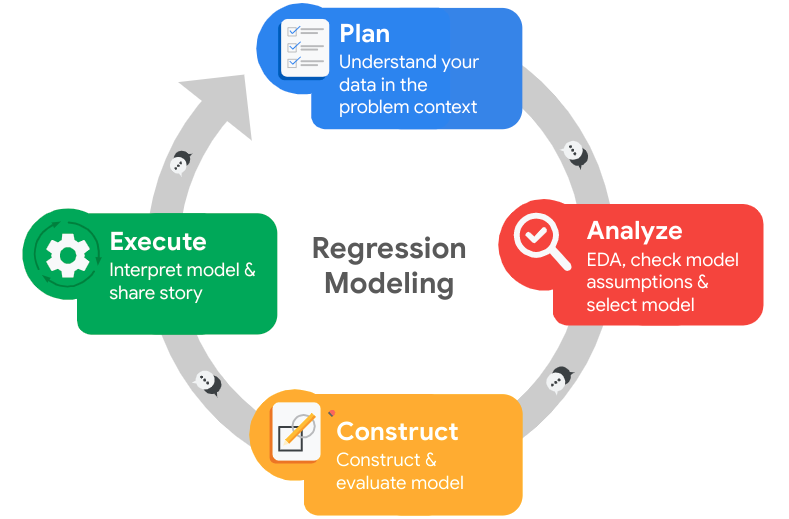

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

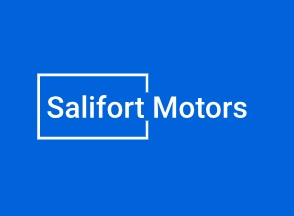

### Familiarizing with the HR dataset

The dataset in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages

# Operational
import numpy as np
import pandas as pd
import datetime as dt

# Statistics Related
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Model Related
# Selection
from sklearn.model_selection import train_test_split, GridSearchCV
# Pre-Processing
from sklearn.preprocessing import MinMaxScaler
# Model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
# Metrics
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, roc_auc_score, \
roc_curve, auc, ConfusionMatrixDisplay, confusion_matrix, classification_report, RocCurveDisplay
from xgboost import plot_importance

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe

df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe(include='all')


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df0 = df0.rename(columns={'satisfaction_level' : 'satisfaction',
                         'average_montly_hours' : 'avg_monthly_hours',
                         'time_spend_company' : 'tenure',
                         'Work_accident' : 'work_accident',
                         'Department' : 'department'})


# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction', 'last_evaluation', 'number_project',
       'avg_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
df0.isna().sum()


satisfaction             0
last_evaluation          0
number_project           0
avg_monthly_hours        0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
df0.duplicated().sum()


3008

In [9]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()]

,satisfaction,last_evaluation,number_project,avg_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df = df0.drop_duplicates()
df.reset_index(inplace=True, drop=True)
# Display first few rows of new dataframe as needed
df.head(10)

,satisfaction,last_evaluation,number_project,avg_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

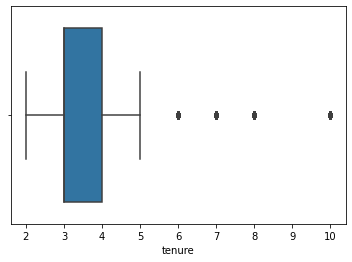

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(df['tenure']);



From the boxplot, we can see that outliers occur beyond the right whisker from year 6 onwards.  We will use this observation as a basis for determining the number of rows containing outliers.

In [12]:
# Determine the number of rows containing outliers
(df['tenure'] > 5).sum()


824

Logistic regression is more sensitive to outliers than Decision Trees or Random Forests and XGBoost. At this point, we will take note of these outliers and may remove it depending on the model choice. 

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
df['left'].value_counts()

0    10000
1     1991
Name: left, dtype: int64

In [14]:
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
df['left'].value_counts(normalize=True)

0    0.833959
1    0.166041
Name: left, dtype: float64

### Data visualizations

Now, we create a parplot of all the variables to get an overview of their distribution.

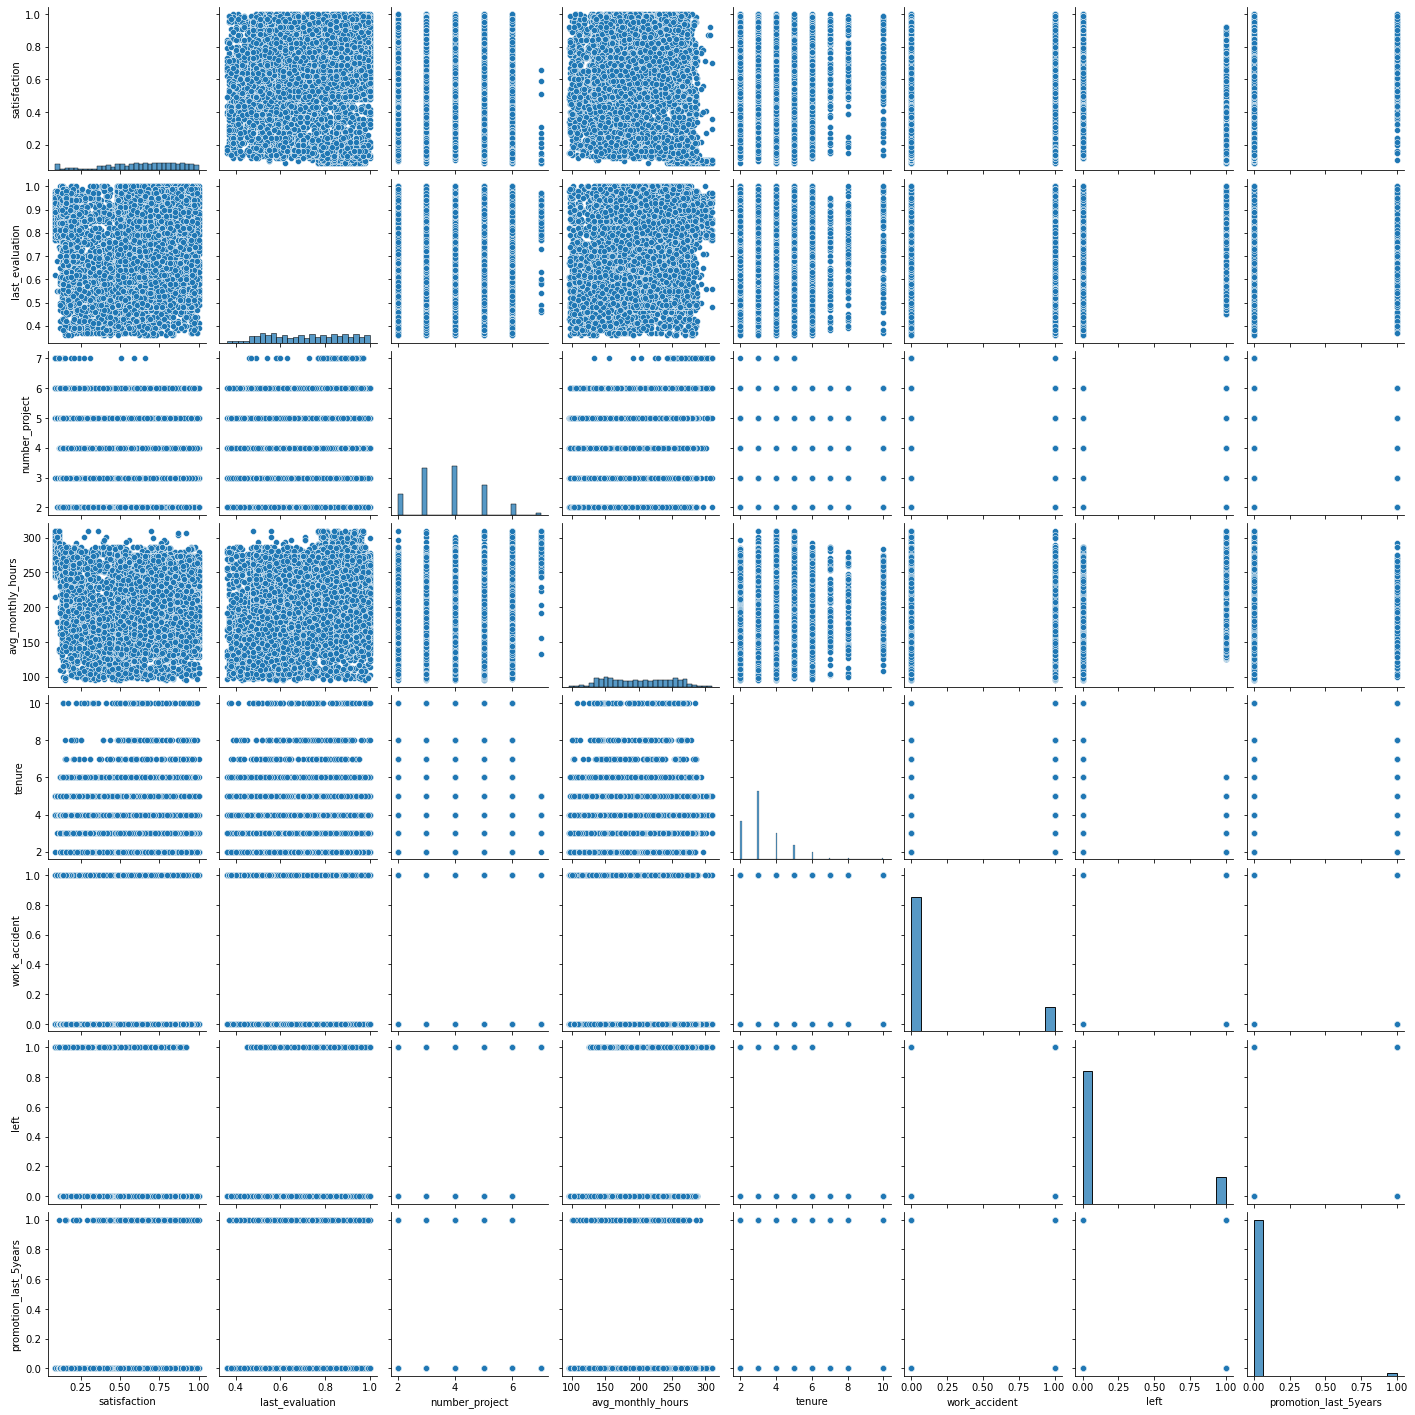

In [15]:
# a pairplot of all the variables
sns.pairplot(df);

From the pairplot, we can see that for those who left, they tend to handle more projects, worked longer working hours, have a lower satisfaction and have a shorter tenure at the company.  We will explore these variables with further plots.

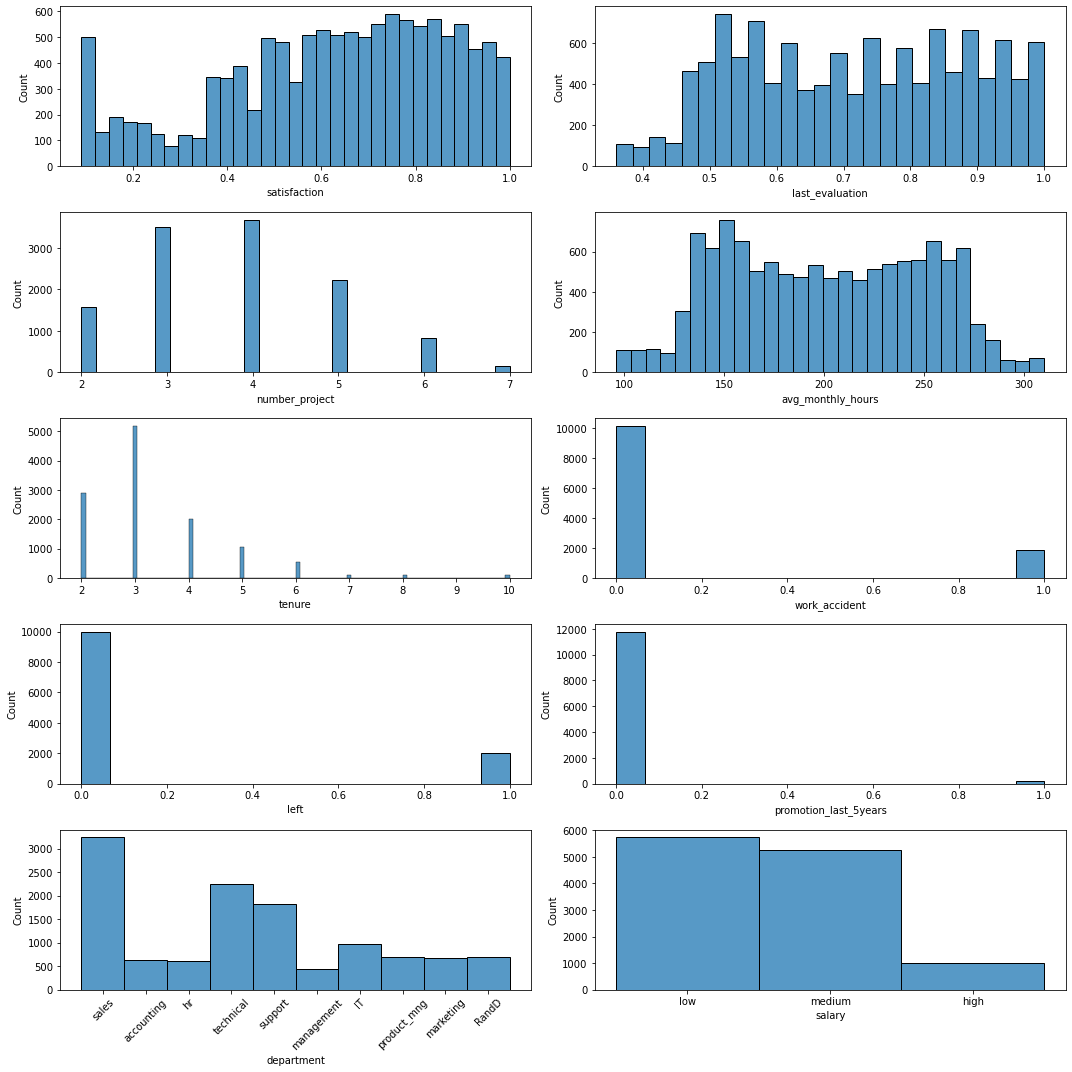

In [16]:
# barplots of each feature

fig, axes = plt.subplots(5, 2, figsize=(15, 15))
sns.histplot(df['satisfaction'], ax=axes[0, 0])
sns.histplot(df['last_evaluation'], ax=axes[0, 1])
sns.histplot(df['number_project'], ax=axes[1, 0])
sns.histplot(df['avg_monthly_hours'], ax=axes[1, 1])
sns.histplot(df['tenure'], ax=axes[2, 0])
sns.histplot(df['work_accident'], ax=axes[2, 1])
sns.histplot(df['left'], ax=axes[3, 0])
sns.histplot(df['promotion_last_5years'], ax=axes[3, 1])
sns.histplot(df['department'], ax=axes[4, 0])
axes[4, 0].tick_params(axis='x', labelrotation=45)
sns.histplot(df['salary'], ax=axes[4, 1])

plt.tight_layout()  
plt.show()

Let us examine `number_project` and `avg_monthly_hours` further

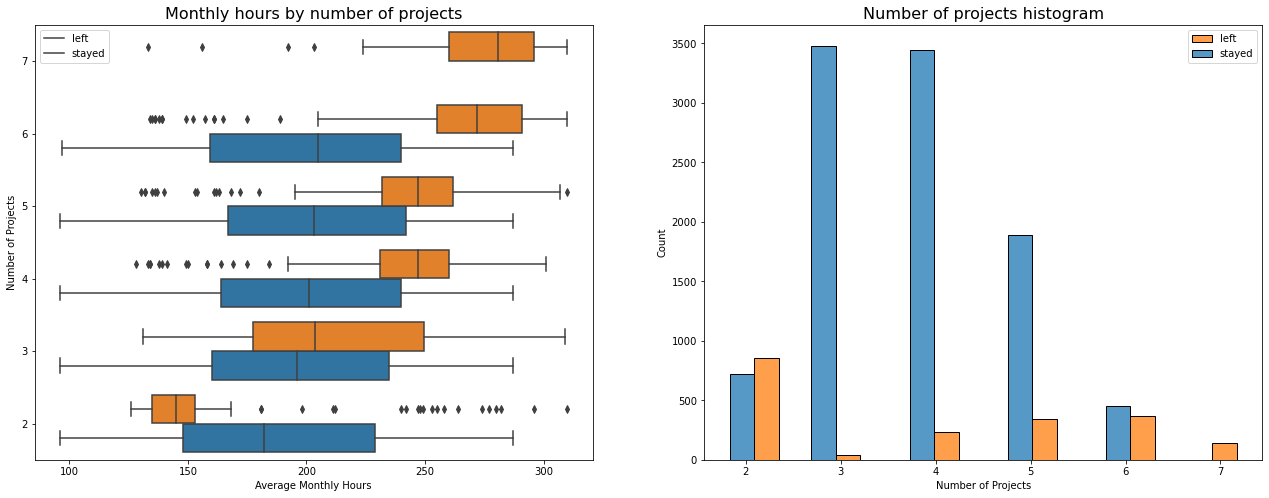

In [17]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize=(22, 8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df, x='avg_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0]).legend(labels=["left","stayed"])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='16')
ax[0].set_xlabel('Average Monthly Hours')
ax[0].set_ylabel('Number of Projects')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
sns.histplot(data=df, x='number_project', hue='left', multiple='dodge', shrink=3, ax=ax[1])
plt.legend(labels=["left","stayed"])
ax[1].set_title('Number of projects histogram', fontsize='16')
ax[1].set_xlabel('Number of Projects')
ax[1].set_ylabel('Count')


# Display the plots
plt.show()

From the boxplot of `Average Monthly Hours` for each `Number of Projects`, we can see that for those who left, they tend to work longer hours and more handle more projects.  The exception is for those who handle 2 projects and left, they work shorter hours.  This probably suggests that they may be terminated.  The histogram of `Number of Projects` handled by employees shows that the proportionally higher number of those who left handled 2, 6 and 7 projects.
Next we shall examine `satisfaction` and `avg_monthly_hours`

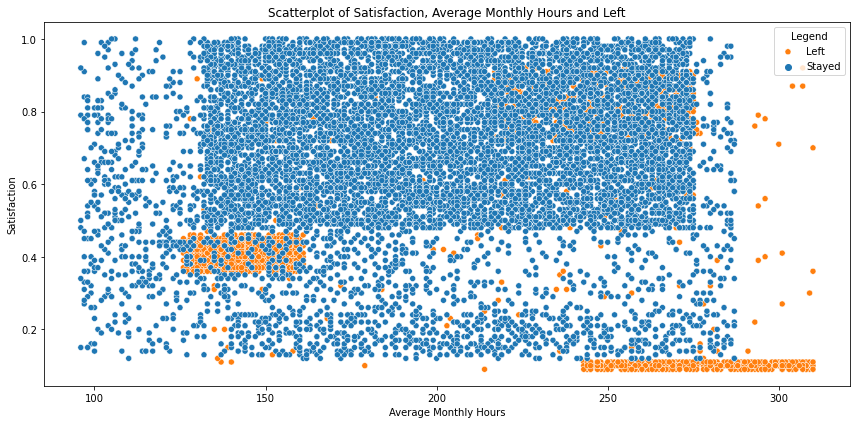

In [18]:
# Scatterplot of Satisfaction, Monthly Hours and Left
plt.figure(figsize=(12, 6))
sns.scatterplot(x='avg_monthly_hours', y='satisfaction', hue='left', data=df)
plt.xlabel('Average Monthly Hours')
plt.ylabel('Satisfaction')
plt.title('Scatterplot of Satisfaction, Average Monthly Hours and Left')
plt.legend(title='Legend', loc='upper right', labels=['Left','Stayed'])
plt.tight_layout()
plt.show()


In [19]:
# Calculate the median Average Monthly hours worked
df['avg_monthly_hours'].median()

200.0

To get an idea of what is over- or under- worked, we calculate the median `avg_monthly_hours`. The median average monthly hours worked at Salifort Motors is 200 hours.

From the scatterplot of `Satisfaction` and `Average Monthly Hours`, we can see roughly three groups of employees that left:
- A group that worked 240 to 310 hours per month with a low satisfaction of around 0.1. This is way above the median of 200 hours worked. It suggests that they are disatisfied from being overworked.
- A group that worked 230 to 270 hours per month with a high satisfaction of 0.7 to 0.9.
- A group that worked 130 to 160 hours per month, below median of 200 hours with a `Satisfaction` of around 0.4, suggesting a group of quiet quitters.

Next, we examine `last_evaluation` and `avg_monthly_hours`

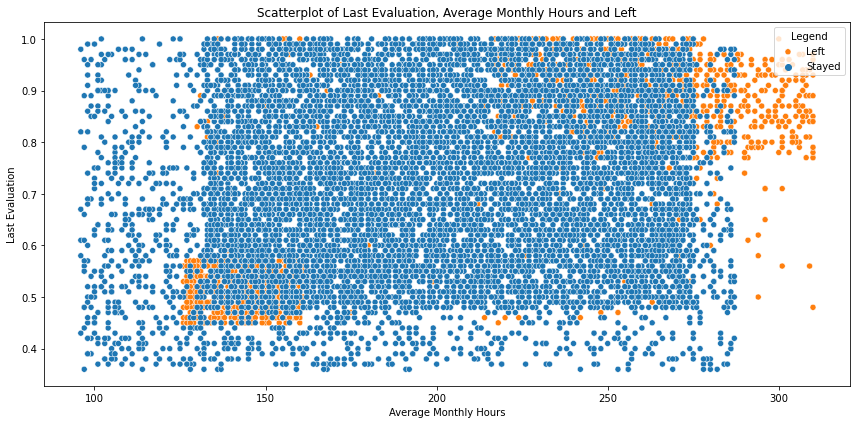

In [20]:
# Scatterplot of Last Evaluation, Monthly Hours and Left
plt.figure(figsize=(12, 6))
sns.scatterplot(x='avg_monthly_hours', y='last_evaluation', hue='left', data=df)
plt.xlabel('Average Monthly Hours')
plt.ylabel('Last Evaluation')
plt.title('Scatterplot of Last Evaluation, Average Monthly Hours and Left')
plt.legend(title='Legend', loc='upper right', labels=['Left','Stayed'])
plt.tight_layout()
plt.show()

From the scatterplot of `Last Evaluation` and `Average Monthly Hours`, we can see roughly two groups of employees that left:
- First group that worked 220 to 310 hours per month with a high `Last Evaluation` score of 0.8 to 1.
- Second group that worked 125 to 160 hours - below median - with a `Last Evaluation` score of 0.45 to 0.6.

Next, we shall examine `satisfaction` and `tenure`

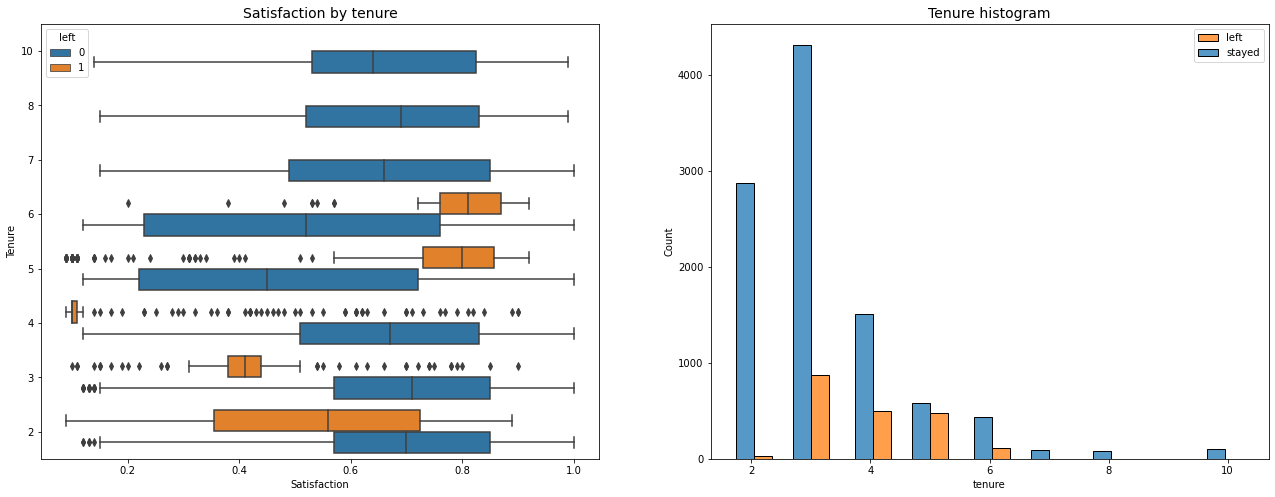

In [21]:
# Satisfaction by tenure

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df, x='satisfaction', y='tenure', hue='left', orient="h", ax=ax[0])
plt.legend(labels=["left","stayed"])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')
ax[0].set_xlabel('Satisfaction')
ax[0].set_ylabel('Tenure')

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = df[df['left']==0]['tenure']
tenure_left = df[df['left']==1]['tenure']
sns.histplot(data=df, x='tenure', hue='left', multiple='dodge', shrink=7, ax=ax[1])
plt.legend(labels=["left","stayed"])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();

- From the boxplot above, we can see two categories of employees that left - dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures.
- Four year employees that left seem to have a low satisfaction level.
- The histogram shows that the longer tenured employees - 7 years and above do not leave.

Next, we examine departure by `department`


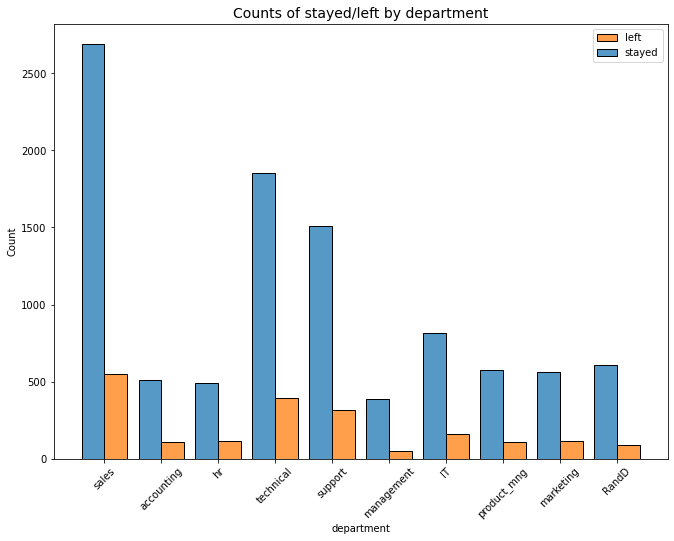

In [22]:
# A histogram to comparing department distribution of employees who left to that of employees who stayed
plt.figure(figsize=(11,8))
sns.histplot(data=df, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=0.8)
plt.legend(labels=["left","stayed"])
plt.xticks(rotation='45')
plt.title('Counts of stayed/left by department', fontsize=14);

There does not seem to be any department that has a significant departure of employees.

Next, we explore `satisfaction` and `last_evaluation`

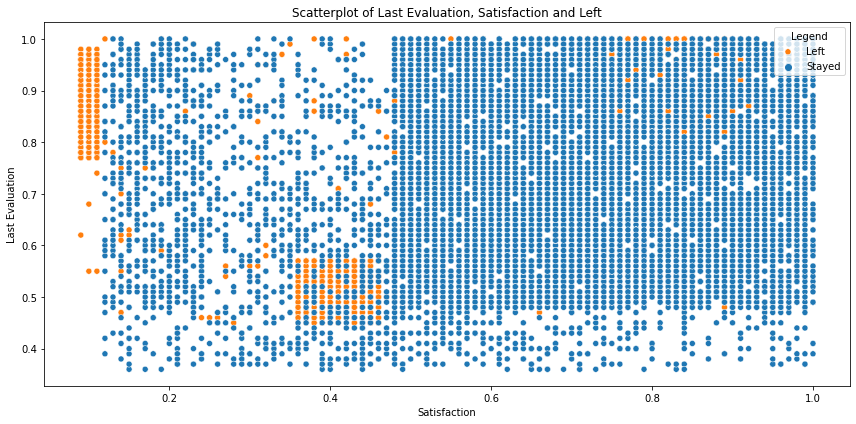

In [23]:
# Scatterplot of Last Evaluation, Satisfaction and Left
plt.figure(figsize=(12, 6))
sns.scatterplot(x='satisfaction', y='last_evaluation', hue='left', data=df)
plt.xlabel('Satisfaction')
plt.ylabel('Last Evaluation')
plt.title('Scatterplot of Last Evaluation, Satisfaction and Left')
plt.legend(title='Legend', loc='upper right', labels=['Left','Stayed'])
plt.tight_layout()
plt.show()


The scatterplot of `Last Evaluation` and `Satisfaction` reveals two groups that left:-
- A group with high evaluation score of 0.8 to 1 but very low satisfaction of 0.1.
- A group with average evaluation score of 0.45 to 0.6 and satisfaction of 0.35 to 0.5.

Next, we will examine `avg_monthly_hours`, `salary` and `promotion_last_5years`

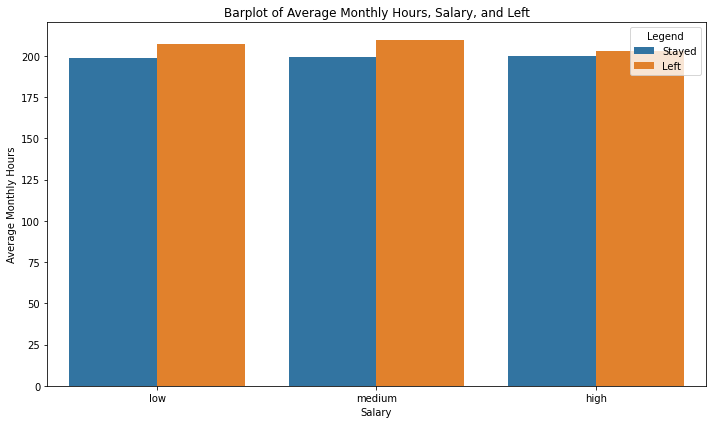

In [24]:
# Barplot of Average Monthly Hours, Salary and Left

plt.figure(figsize=(10, 6))
sns.barplot(x='salary', y='avg_monthly_hours', hue='left', data=df, ci=None)
plt.xlabel('Salary')
plt.ylabel('Average Monthly Hours')
plt.title('Barplot of Average Monthly Hours, Salary, and Left')
plt.legend(title='Legend', loc='upper right', labels=['Stayed', 'Left'])
plt.tight_layout()
plt.show()

From the barplot of `Salary` and `Average Monthly Hours` worked, we can see that those who left tend to put in more average hours worked across all 3 salary categories.

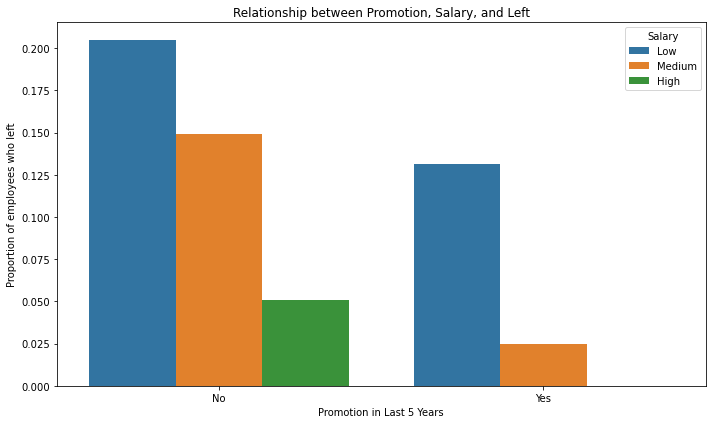

In [25]:
# Barplot of Promotion, Salary and Left

plt.figure(figsize=(10, 6))
sns.barplot(x='promotion_last_5years', y='left', hue='salary', data=df, ci=None)
plt.xlabel('Promotion in Last 5 Years')
plt.ylabel('Proportion of employees who left')
plt.title('Relationship between Promotion, Salary, and Left')
plt.legend(title='Salary', loc='upper right', labels=['Low', 'Medium', 'High'])
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.tight_layout() 
plt.show()

The barplot of `Promotion in Last 5 Years` and `Salary` shows a higher proportion of those who did not receive promotion in the last 5 years leaving, with those in the low salary category having the highest proportion who left, followed by medium and high salaries.

### Insights

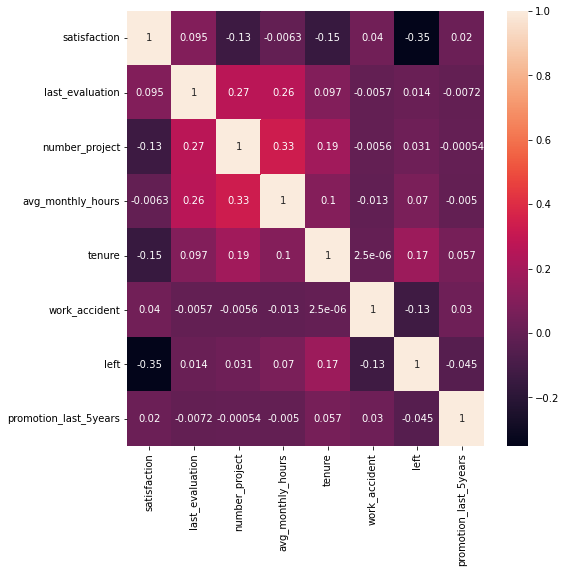

In [26]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(), annot=True);

The heatmap shows that the `number_projects`, `avg_monthly_hours`, and `last_evaluation` scores all have some positive correlation with each other. Also, whether an employee leaves is negatively correlated with their `satisfaction` level.

- From the exploratory plots above, it seems that employees who leave tend to be working long hours, handling many projects and have generally lower satisfaction levels.
- Salary does not seem to have an impact on the employee's decision to leave.
- Promotion has some influence on leaving decision.
- Employees who work 6 years or longer do not leave.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The task is to predict whether the staff will stay or leave

### Identify the types of models most appropriate for this task.

As it is a binary classification task, the models most appropriate are Logistic Regression, Random Forests and XGBoost.
However, as there are outliers and the outcome variable is imbalanced, we shall use Random Forests and XGBoost models.

### Modeling



We will encode the categorical variables

In [27]:
# encode the categorical columns
df = pd.get_dummies(df, drop_first=True)
df

,satisfaction,last_evaluation,number_project,avg_monthly_hours,tenure,work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11986,0.90,0.55,3,259,10,1,0,1,0,0,0,1,0,0,0,0,0,0,0
11987,0.74,0.95,5,266,10,0,0,1,0,0,0,1,0,0,0,0,0,0,0
11988,0.85,0.54,3,185,10,0,0,1,0,0,0,1,0,0,0,0,0,0,0
11989,0.33,0.65,3,172,10,0,0,1,0,0,0,0,1,0,0,0,0,0,0


We will split 75% of the dataset for training and 25% for testing.

In [28]:
# split the data into train and test
X = df.drop('left', axis=1)
y = df['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)
# we stratify to y because of the  83/17 imbalance of y

### Random Forest Classifier

In [29]:
# instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42)

# select a range of hyperparameters
cv_params = {'max_depth': [7,8,9,10], 
             'max_features': ["sqrt"],
             'max_samples': [0.7,0.8,0.9],
             'min_samples_leaf': [1,2],
             'min_samples_split': [3,4,5],
             'n_estimators': [100, 150],
             }
# a tuple of scoring metrics
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Grid search and 5 fold cross validation
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='f1')

In [30]:
%%time
# fit the model
rf1.fit(X_train, y_train)

CPU times: user 5min 45s, sys: 1.07 s, total: 5min 46s
Wall time: 5min 46s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [31]:
# See the best paramters
rf1.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 100}

In [32]:
# See the best score
rf1.best_score_

0.9426341064561683

In [33]:
# create a make results function that displays results in a table
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 'roc_auc' : 'mean_test_roc_auc'
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    roc_auc = best_estimator_results.mean_test_roc_auc

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        'roc_auc' : [roc_auc]},
                       )

    return table

In [34]:
# call make_results() on Grid Search object
results = make_results("Random Forest CV", rf1, "f1")
results

,model,precision,recall,F1,accuracy,roc_auc
0,Random Forest CV,0.979821,0.908233,0.942634,0.981652,0.980097


In [35]:
# Get scores on test data
rf_preds = rf1.best_estimator_.predict(X_test)

In [36]:
# create a get test scores function that displays test results in a table

def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
    model_name (string): Your choice: how the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

    Out:
    table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)
    roc_auc = roc_auc_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        'roc_auc' : [roc_auc]
                        })

    return table

In [37]:
# Get scores on test data
rf_test_scores = get_test_scores("Random Forest Test", rf_preds, y_test)
results = pd.concat([results, rf_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy,roc_auc
0,Random Forest CV,0.979821,0.908233,0.942634,0.981652,0.980097
0,Random Forest Test,0.989224,0.921687,0.954262,0.985324,0.959843


### XGBoost Classifier

In [38]:
# Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

# Create a dictionary of hyperparameters to tune

cv_params = {'max_depth': [10, 12, 14],
              'min_child_weight': [3, 5],
              'learning_rate': [0.3, 0.4, 0.5],
              'n_estimators': [15, 20, 25],
              'subsample': [0.7,0.8,0.9],
              'colsample_bytree': [0.7,0.8,0.9]
              }
# Create a tuple of scoring metrics

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}
# Instantiate the GridSearchCV object

xgb_cv = GridSearchCV(xgb,
                      cv_params,
                      scoring=scoring,
                      cv=5,
                      refit='f1'
                     )

In [39]:
%%time
# fit an XGBoost model
xgb_cv.fit(X_train, y_train)

CPU times: user 13min 46s, sys: 6.17 s, total: 13min 52s
Wall time: 7min 6s


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     reg_alpha=None, ...),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9],
                         'learning_rate': [0.3, 0.4, 0.5],
                         'max_depth': [10, 12, 14], 'min_ch

In [40]:
# get the best hyperparmaters from the Grid Search
xgb_cv.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.3,
 'max_depth': 12,
 'min_child_weight': 3,
 'n_estimators': 20,
 'subsample': 0.9}

In [41]:
# The best F1 score
xgb_cv.best_score_

0.9468591107446127

In [42]:
# Call make_results() on the GridSearch object
xgb_cv_results = make_results('XGB CV', xgb_cv, 'f1')
results = pd.concat([results, xgb_cv_results], axis=0)
results

,model,precision,recall,F1,accuracy,roc_auc
0,Random Forest CV,0.979821,0.908233,0.942634,0.981652,0.980097
0,Random Forest Test,0.989224,0.921687,0.954262,0.985324,0.959843
0,XGB CV,0.982758,0.913587,0.946859,0.982987,0.983246


In [43]:
# Get scores on test data
xgb_preds = xgb_cv.best_estimator_.predict(X_test)

In [44]:
# Get scores on test data
xgb_test_scores = get_test_scores('XGB Test', xgb_preds, y_test)
results = pd.concat([results, xgb_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy,roc_auc
0,Random Forest CV,0.979821,0.908233,0.942634,0.981652,0.980097
0,Random Forest Test,0.989224,0.921687,0.954262,0.985324,0.959843
0,XGB CV,0.982758,0.913587,0.946859,0.982987,0.983246
0,XGB Test,0.987152,0.925703,0.955440,0.985657,0.961651


#### From the table above, XGB test has the highest F1 score, higher than the training dataset.  Let's examine its confusion matrix and ROC AUC curve

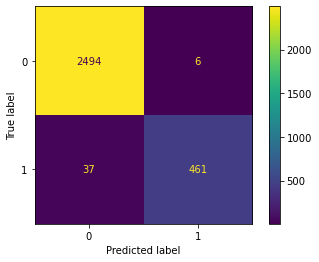

In [45]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, xgb_preds, labels=xgb_cv.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=xgb_cv.classes_)
disp.plot(values_format='');

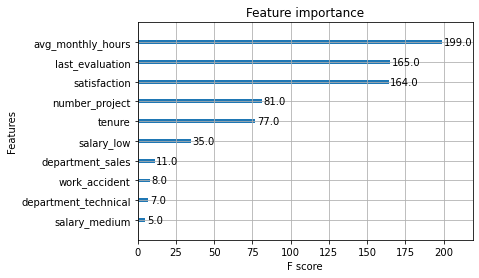

In [46]:
# 10 most important features
plot_importance(xgb_cv.best_estimator_, max_num_features=10);

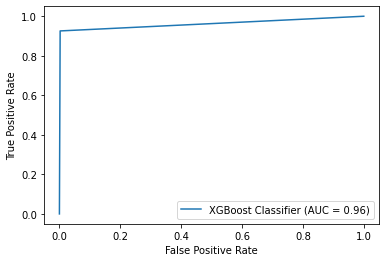

In [47]:
# Display ROC AUC curve

fpr, tpr, thresholds = roc_curve(y_test, xgb_preds)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                    estimator_name='XGBoost Classifier')
display.plot();

The ROC plot shows what a high ROC AUC looks like - a rising True Positive rate with a slower increase in False Positive rate.  The suggests that the model classifies the label well with the main features.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



### Reflections

- From the model's prediction,  5 features that have an impact (highest F scores) on staff leaving are `avg_monthly_hours`, `last_evaluation`, `satisfaction`, `number_project` and `tenure`.
- From the EDA, it could be seen that `avg_monthly_hours` had impact on leaving across all salary levels and especially for the low `salary` category as reflected in feature importance.  For this category of `salary`, it is a case of being overworked and underpaid.
- Interestingly, the model found `promotion_last_5years` had minimal impact on leaving.
- Based on the model's findings, we would recommend that management examine employees with high `avg_monthly_hours` and high `number_projects` and see if a reduction of both are possible for these employees.  Also, there seems to be a group that had high `last_evaluation` but low `satisfaction` and left.
- We can improve the model by examining what are the factors that impact `satisfaction`.



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

In [48]:
results

,model,precision,recall,F1,accuracy,roc_auc
0,Random Forest CV,0.979821,0.908233,0.942634,0.981652,0.980097
0,Random Forest Test,0.989224,0.921687,0.954262,0.985324,0.959843
0,XGB CV,0.982758,0.913587,0.946859,0.982987,0.983246
0,XGB Test,0.987152,0.925703,0.955440,0.985657,0.961651


- As can be seen from the table above, the F1 for both Random Forest and XGBoost test dataset are higher than the validation dataset.  This suggests that both models generalize well to unseen data.
- Comparing the two models' F1 score on the test dataset, XGBoost is slightly higher at 0.955.
- Also, ROC AUC is higher for XGBoost.
- As such, we select the XGBoost model for this Salifort Motors project

### Conclusion, Recommendations, Next Steps

- Management should cap the number of projects that employees can work on.
- Management should consider promoting employees who have been with the company for at least four years, or conduct further investigation about why four-year tenured employees are so dissatisfied.
- Company should either reward employees for working longer hours, or don't require them to do so.
#### Next Steps


- We could use K-Means to unveil clusters that may give us further insights that supervised models may not.